# Online Shopper-Baseline + External train-valid split

This is a preprocessed dataset. Some of the variables are dropped. All variables are converted to numeric. Revenue is the target variable. It is a factorial varible converted to numeric. This is a classification problem.


Import python data science libraries. Set number of displayed rows and columns, as well as width of pandas table.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



Import train and test datasets

In [2]:
train_full = pd.read_csv('https://raw.githubusercontent.com/nopynospy/apu_deep_learning/main/online%20shop_train.csv')

In [3]:
test = pd.read_csv('https://raw.githubusercontent.com/nopynospy/apu_deep_learning/main/online%20shop_test.csv')

Get the number of rows and columns of both datasets

In [4]:
train_full.shape

(16626, 13)

In [5]:
test.shape

(2466, 13)

Show first 5 rows in train dataset

In [6]:
train_full.head()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType0,VisitorType1,Weekend,Revenue
0,0,0,12,0.069444,0.000000,0.8,5,2,2,0.0,1.0,0,0
1,0,0,44,0.032143,0.000000,0.0,12,1,1,0.0,1.0,0,0
2,2,0,7,0.011111,0.000000,0.0,3,8,2,0.0,0.0,0,0
3,3,0,37,0.004274,47.931282,0.0,5,3,2,0.0,0.0,1,1
4,0,0,1,0.200000,0.000000,0.0,5,3,3,0.0,1.0,1,0


Get descriptives in train dataset

In [7]:
train_full.describe()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType0,VisitorType1,Weekend,Revenue
count,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.00000,16626.000000,16626.000000
mean,2.297907,0.457296,37.823950,0.033312,14.074354,0.038374,8.129737,2.838807,3.556358,0.004451,0.82359,0.238181,0.500000
std,3.168297,1.160715,50.922376,0.040125,27.136885,0.159034,3.354549,2.277844,3.514761,0.066568,0.38118,0.425983,0.500015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,0.012372,0.000000,0.000000,5.000000,1.000000,2.000000,0.000000,1.00000,0.000000,0.000000
50%,1.000000,0.000000,21.000000,0.020534,0.000000,0.000000,10.000000,2.000000,2.000000,0.000000,1.00000,0.000000,0.500000
75%,4.000000,0.000000,44.000000,0.035150,17.857937,0.000000,11.000000,4.000000,4.000000,0.000000,1.00000,0.000000,1.000000
max,27.000000,24.000000,705.000000,0.200000,361.763742,1.000000,12.000000,9.000000,20.000000,1.000000,1.00000,1.000000,1.000000


Get the specifications of each column in train dataset

In [8]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Administrative  16626 non-null  int64  
 1   Informational   16626 non-null  int64  
 2   ProductRelated  16626 non-null  int64  
 3   ExitRates       16626 non-null  float64
 4   PageValues      16626 non-null  float64
 5   SpecialDay      16626 non-null  float64
 6   Month           16626 non-null  int64  
 7   Region          16626 non-null  int64  
 8   TrafficType     16626 non-null  int64  
 9   VisitorType0    16626 non-null  float64
 10  VisitorType1    16626 non-null  float64
 11  Weekend         16626 non-null  int64  
 12  Revenue         16626 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 1.6 MB


Based on the previous code blocks, all of the columns are numeric. However, VisitorType0 and VisitorType1 are binaries (only 0 and 1), so their float64 can be changed to int64, because of the lack of decimals.

In [9]:
train_full.VisitorType0 = train_full.VisitorType0.astype(int)
train_full.VisitorType1 = train_full.VisitorType1.astype(int)
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Administrative  16626 non-null  int64  
 1   Informational   16626 non-null  int64  
 2   ProductRelated  16626 non-null  int64  
 3   ExitRates       16626 non-null  float64
 4   PageValues      16626 non-null  float64
 5   SpecialDay      16626 non-null  float64
 6   Month           16626 non-null  int64  
 7   Region          16626 non-null  int64  
 8   TrafficType     16626 non-null  int64  
 9   VisitorType0    16626 non-null  int64  
 10  VisitorType1    16626 non-null  int64  
 11  Weekend         16626 non-null  int64  
 12  Revenue         16626 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.6 MB


Use seaborn, a visualization library, to create a count plot on the revenue column.

In [10]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


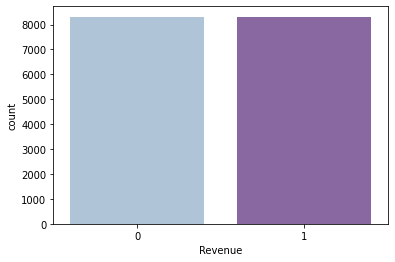

In [11]:

sns.countplot(train_full['Revenue'], palette='BuPu')

This is a balanced dataset

Import matplotlib, a visualization library, to create a heatmap on the Pearson correlations among the variables in training dataset.

In [12]:
import matplotlib.pyplot as plt

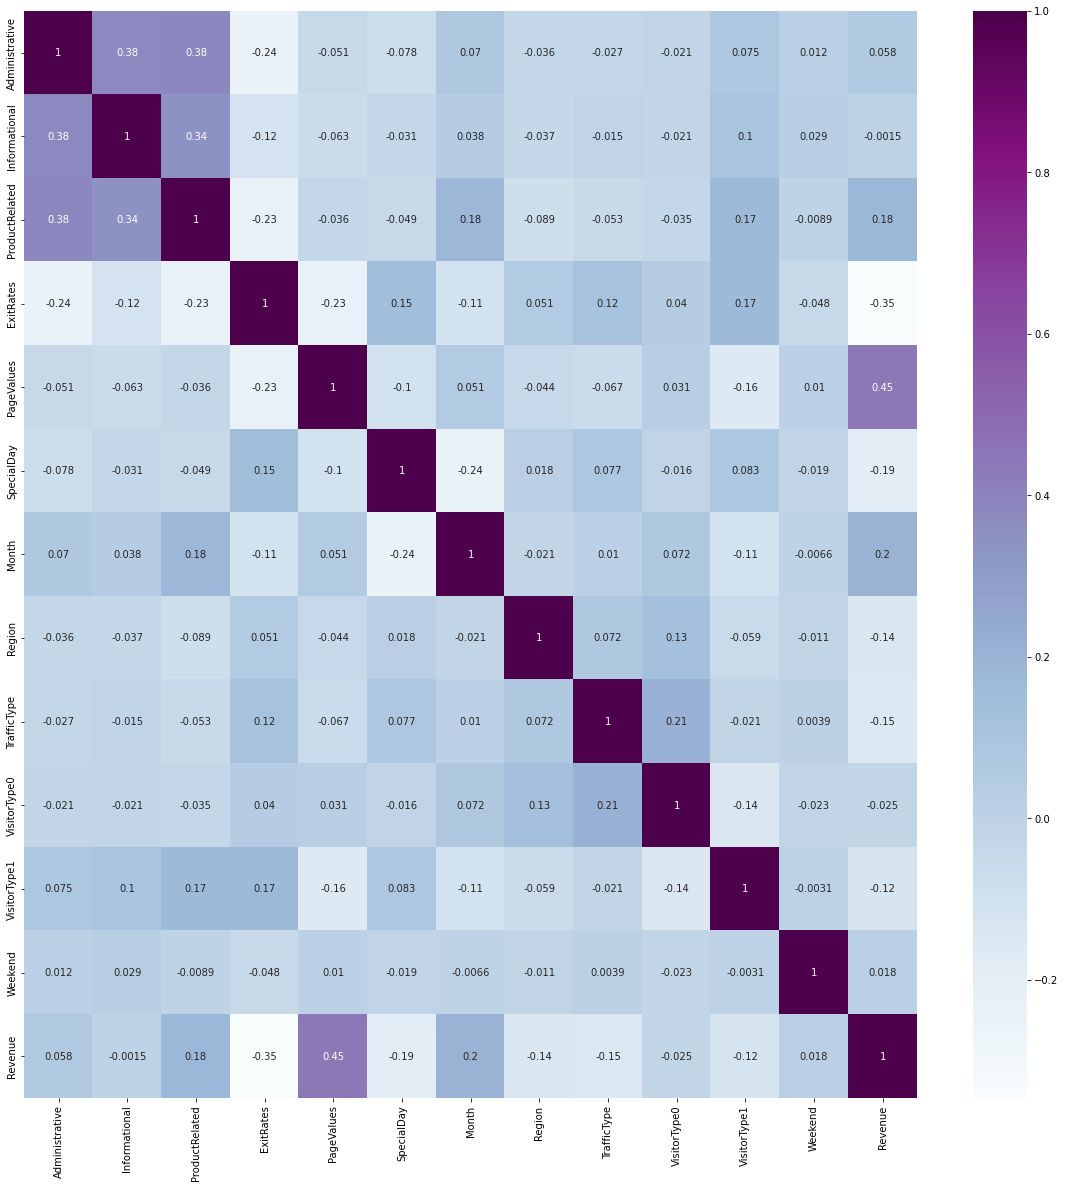

In [13]:
plt.figure(figsize = (20,20))
g = sns.heatmap(train_full.corr(),annot=True, cmap = 'BuPu')

Comment: Revenue has maximum correlation with PageValues


## Split train_full data into train and validation datasets using Sklearn

The split is done at a 0.8:0.2 ratio

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
train, valid = train_test_split (train_full, test_size = 0.2, random_state = 0)

In [16]:
train.shape

(13300, 13)

In [17]:
valid.shape

(3326, 13)

Because revenue is the independent variable (y) and it is at the last column in the datasets, iloc can be used with a -1 index to seperate the datasets into train and valid sets.

In [18]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

In [19]:
X_valid = valid.iloc[:,:-1]
y_valid = valid.iloc[:,-1]

In [20]:
X_train.shape

(13300, 12)

In [21]:
X_valid.shape

(3326, 12)

### Task: For your dataset, include code to check the balance of train and valid data

In [23]:
y_train.head()

11159    1
3002     0
2411     0
15753    1
2584     0
Name: Revenue, dtype: int64

Because there is only 1 column, which does not even have its own header, to use countplot on it, just put the dataset name without its column header.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


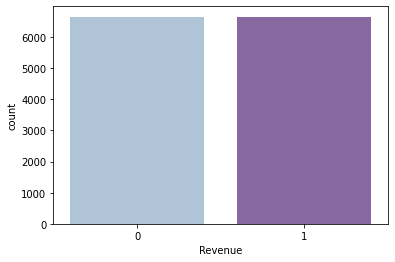

In [24]:
sns.countplot(y_train, palette='BuPu')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


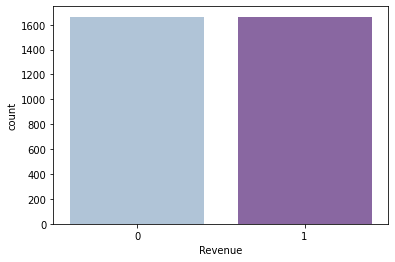

In [25]:
sns.countplot(y_valid, palette='BuPu')

Yes, both datasets are very balanced, which is good for classification

## Call tensor flow and keras

As well as getting the version installed by default in colab. The seeds for both are set to 42, so that the results can be replicated.

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.6.0'

In [28]:
from tensorflow import keras

In [29]:
keras.__version__

'2.6.0'

In [30]:

np.random.seed(42)
tf.random.set_seed(42)

## OneHot Encode Target Variable For Classification


In [31]:
from keras import utils as np_utils

In [32]:
y_tra = keras.utils.to_categorical(y_train, num_classes=None, dtype="float32")

In [33]:
y_val = keras.utils.to_categorical(y_valid, num_classes=None, dtype="float32")

In [35]:
y_tra

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Now we have created train, validate and test sets. target variable y is OneHot encoded. These are: (X_train, y_tra), (X-valid, y_val), (X_test, y_tes)

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [37]:
def create_baseline():
    #Initializing Neural Network
    classifier = Sequential()

    ##Defining the architecture of ANN
   
    # First layer 
    classifier.add(Dense(units = 512, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12))
    
    # Second layer
    classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    
    classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
   
    # Compiling Neural Network
    ## specifying optimizer 
    ## This is the metaparameter, specfiying the metaparameter , (adam is popular optimizer like SGD, and GD, 
    ## the binary_corssentropy is because it has 2 class)
    
    
    # classifier.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

model = create_baseline()
print(model.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None


*   Because this is sequential, only in first layer that input dimension is specified, so the next layer will use it as input
*   ReLU stands for rectified linear unit activation function
*   'None' in the output shape is 'None' because the first dimension refers to batch size. In most situations, it will be redefined and not fixed, so it is ignored by the library.
*   The calculation of param is shape * (input dimenstion + 1). For example, 512 * (12 + 1) = 6656. 128 * (512 + 1) = 65664.
*   Compared to other activation functions, ReLU is computationally more efficient. It is almost like a linear function. It does not saturate and converges faster than other activation functions. The gradient is constant, which helps in the issue of vanishing gradient.
*   Softmax is usually used in output layer to show the probabilities of each class.

In [38]:
history = model.fit(X_train, y_tra, validation_data= (X_valid, y_val), epochs = 50,  batch_size = 32, verbose = 2)
         

Epoch 1/50
416/416 - 2s - loss: 1.1456 - accuracy: 0.7639 - val_loss: 0.4644 - val_accuracy: 0.7727
Epoch 2/50
416/416 - 1s - loss: 0.4589 - accuracy: 0.7941 - val_loss: 0.4682 - val_accuracy: 0.7962
Epoch 3/50
416/416 - 1s - loss: 0.4441 - accuracy: 0.8070 - val_loss: 0.4494 - val_accuracy: 0.8352
Epoch 4/50
416/416 - 1s - loss: 0.4329 - accuracy: 0.8319 - val_loss: 0.5169 - val_accuracy: 0.8064
Epoch 5/50
416/416 - 1s - loss: 0.4200 - accuracy: 0.8361 - val_loss: 0.4379 - val_accuracy: 0.7877
Epoch 6/50
416/416 - 1s - loss: 0.4205 - accuracy: 0.8290 - val_loss: 0.4760 - val_accuracy: 0.7922
Epoch 7/50
416/416 - 1s - loss: 0.4258 - accuracy: 0.8214 - val_loss: 0.4074 - val_accuracy: 0.8331
Epoch 8/50
416/416 - 1s - loss: 0.4036 - accuracy: 0.8419 - val_loss: 0.4148 - val_accuracy: 0.8241
Epoch 9/50
416/416 - 1s - loss: 0.4106 - accuracy: 0.8419 - val_loss: 0.4590 - val_accuracy: 0.8370
Epoch 10/50
416/416 - 1s - loss: 0.4028 - accuracy: 0.8423 - val_loss: 0.3931 - val_accuracy: 0.8416

At each epoch, loss and Accuracy are the current loss and accuracy of the training set. val_loss and val_acc are the loss and accuracy of the trained neural nets to the validation dataset.

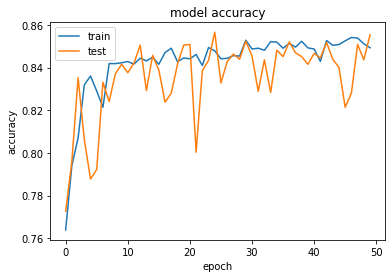

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


There is not much increase in accuracy at higher epochs, so more epochs would not increase accuracy by much.

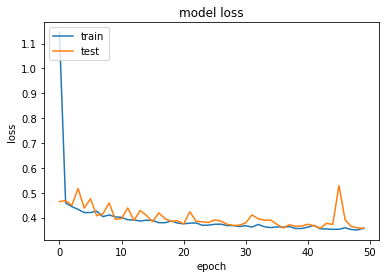

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

At higher epochs, the decrease in losses is not much as well, so more epochs will result in little decrease in losses.

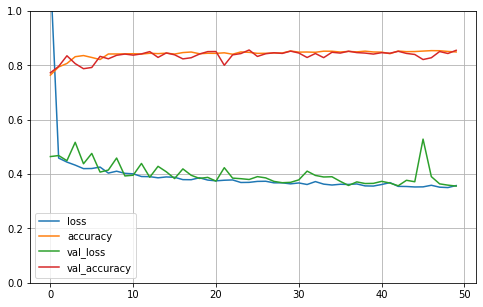

In [39]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

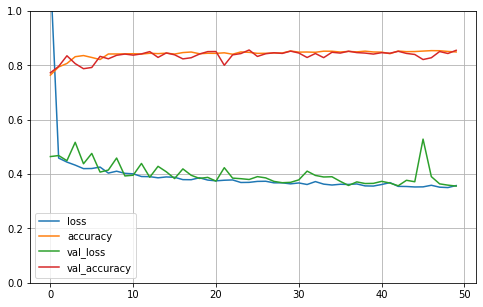

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# plt.savefig ('/content/drive/My Drive/Colab Notebooks/output.png')
plt.show()

## Tasks
1. Compare and comment on the results of Lab2.0 and Lab2.0a. 
2. Create two other network architectures of your choice. Build and compare results among these architectures.
3. Change validation parameters: Optimizer, Epochs. Repeat with Steps 1 and 2



Explore this command:
keras.backend.clear_session()

Memory used will be increased at a global state, especially if models are created in for loop. This command avoids cluttering from old models.

In [44]:
tf.keras.backend.clear_session()